In [ ]:
!pip install ucimlrepo

Dataset : Air Quality UCI

link do repositório: https://archive.ics.uci.edu/ml/datasets/Air+Quality#

Informações sobre o Conjunto de Dados:
O conjunto de dados contém 9358 instâncias de respostas médias por hora de um conjunto de 5 sensores químicos de óxido metálico incorporados em um Dispositivo Multissensor Químico de Qualidade do Ar. O dispositivo estava localizado em campo em uma área significativamente poluída, ao nível da estrada, dentro de uma cidade italiana. Os dados foram registrados de março de 2004 a fevereiro de 2005 (um ano), representando os registros mais longos disponíveis gratuitamente de dispositivos de sensor químico de qualidade do ar implantados em campo. Concentrações médias por hora verdadeiras de referência para CO, Hidrocarbonetos Não Metânicos, Benzeno, Óxidos de Nitrogênio Totais (NOx) e Dióxido de Nitrogênio (NO2) foram fornecidas por um analisador de referência certificado co-localizado. Evidências de sensitividades cruzadas, bem como deriva de conceito e sensor, estão presentes, como descrito em De Vito et al., Sens. And Act. B, Vol. 129,2,2008, afetando eventualmente as capacidades de estimativa de concentração dos sensores. Valores ausentes são marcados com o valor -200. Este conjunto de dados pode ser usado exclusivamente para fins de pesquisa. Fins comerciais estão totalmente excluídos.

Fonte:

Saverio De Vito (saverio.devito '@' enea.it), ENEA - Agência Nacional para Novas Tecnologias, Energia e Desenvolvimento Econômico Sustentável

Informações sobre os Atributos:

* Data (DD/MM/AAAA)

* Hora (HH.MM.SS)

* Concentração verdadeira média por hora de CO em mg/m^3 (analisador de referência)

* Resposta do sensor média por hora PT08.S1 (óxido de estanho) (nominalmente visando CO)

* Concentração verdadeira média por hora de Hidrocarbonetos Não Metânicos em µg/m^3 (analisador de referência)

* oncentração verdadeira média por hora de Benzeno em µg/m^3 (analisador de referência)

* Resposta do sensor média por hora PT08.S2 (titânia) (nominalmente visando NMHC)

* Concentração verdadeira média por hora de NOx em ppb (analisador de referência)

* Resposta do sensor média por hora PT08.S3 (óxido de tungstênio) (nominalmente visando NOx)

* Concentração verdadeira média por hora de NO2 em µg/m^3 (analisador de referência)

* Resposta do sensor média por hora PT08.S4 (óxido de tungstênio) (nominalmente visando NO2)

* Resposta do sensor média por hora PT08.S5 (óxido de índio) (nominalmente visando O3)

* Temperatura em °C

* Umidade Relativa (%)

* AH Umidade Absoluta

# Propostas para a analise exploratória de dados


* Criar uma nova feature para mapear a data em um dia da semana (domingo, segunda, ..., sábado) - OK
* Relacionar a Hora com a concentração de CO etc.. - OK
* Visualização de diferentes gases/poluentes existentes (com isso pode se identificar ou não um tipo de poluição específica).
* Analise da poluição e tipos de poluentes ao longo dos anos.
* Comparação de valores com índices e padrões de qualidade do ar oficialmente aceitáveis.

In [17]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo


In [18]:
#Carregamento do dataset
df = pd.DataFrame(fetch_ucirepo(id=360).data.features)
# Visualizar primeiras linhas
print(df.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4 

In [19]:
# Informações gerais sobre o dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB
None


Note que o dataset não apresenta valores nulos, isso se deve ao fato de que os valores nulos foram mapeados como -200. É possível checar que todos os atrubutos tem valor mínimo igual a -200.

In [20]:
# Estatísticas descritivas
print(df.describe())

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200

In [21]:
#remove valores -200
df[df == -200] = np.nan
df = df.interpolate()

C:\Users\Victor\AppData\Local\Temp\ipykernel_13492\530903626.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


In [22]:
df.describe() #depois da interpolação

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      2.130603  1103.059741   269.834349    10.179155     942.142620   
std       1.431736   218.196346    74.251999     7.503812     267.866611   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.100000   938.000000   275.000000     4.500000     736.000000   
50%       1.800000  1067.000000   275.000000     8.300000     910.012987   
75%       2.900000  1239.000000   275.000000    14.100000    1119.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    241.922197    832.758897   109.632094   1453.298814  1032.544298   
std     204.315075    255.709833    46.462311    343.206131   404.447613   
min       2.000000    322.000000     2.000000    551.000000   221.000000   
25%      96.000000    654.000000    76.000000   1227.000000   733.000000   
50%     180.000000    804.000000   104.917526   1460.000000   970.000000   
75%     326.000000    968.000000   136.314685   1668.000000  1293.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean     18.233408    49.191386     1.019621  
std       8.781791    17.194506     0.402203  
min      -1.900000     9.200000     0.184700  
25%      11.700000    35.800000     0.732300  
50%      17.600000    49.600000     0.989500  
75%      24.300000    62.300000     1.306700  
max      44.600000    88.700000     2.231000

In [23]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [25]:
df.Date = df.Date.astype('datetime64[ns]')

In [26]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

Dividindo as bases em (GT) e (PTO8):
(GT) Refere-se à concentração média verdadeira horária do componente pelo analisador de referência, enquanto que (PT08) refere-se à resposta média do sensor por hora.

In [34]:
df_GT = df[['Date','Time','CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)','T','RH','AH']]
df_PT08 = df[['Date','Time','PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']]

In [36]:
df_GT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9357 non-null   datetime64[ns]
 1   Time      9357 non-null   object        
 2   CO(GT)    9357 non-null   float64       
 3   NMHC(GT)  9357 non-null   float64       
 4   C6H6(GT)  9357 non-null   float64       
 5   NOx(GT)   9357 non-null   float64       
 6   NO2(GT)   9357 non-null   float64       
 7   T         9357 non-null   float64       
 8   RH        9357 non-null   float64       
 9   AH        9357 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 731.1+ KB


In [37]:
df_PT08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   PT08.S1(CO)    9357 non-null   float64       
 3   PT08.S2(NMHC)  9357 non-null   float64       
 4   PT08.S3(NOx)   9357 non-null   float64       
 5   PT08.S4(NO2)   9357 non-null   float64       
 6   PT08.S5(O3)    9357 non-null   float64       
 7   T              9357 non-null   float64       
 8   RH             9357 non-null   float64       
 9   AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 731.1+ KB


# Vamos analisar a correlação entre as variáveis e verificar graficamente.

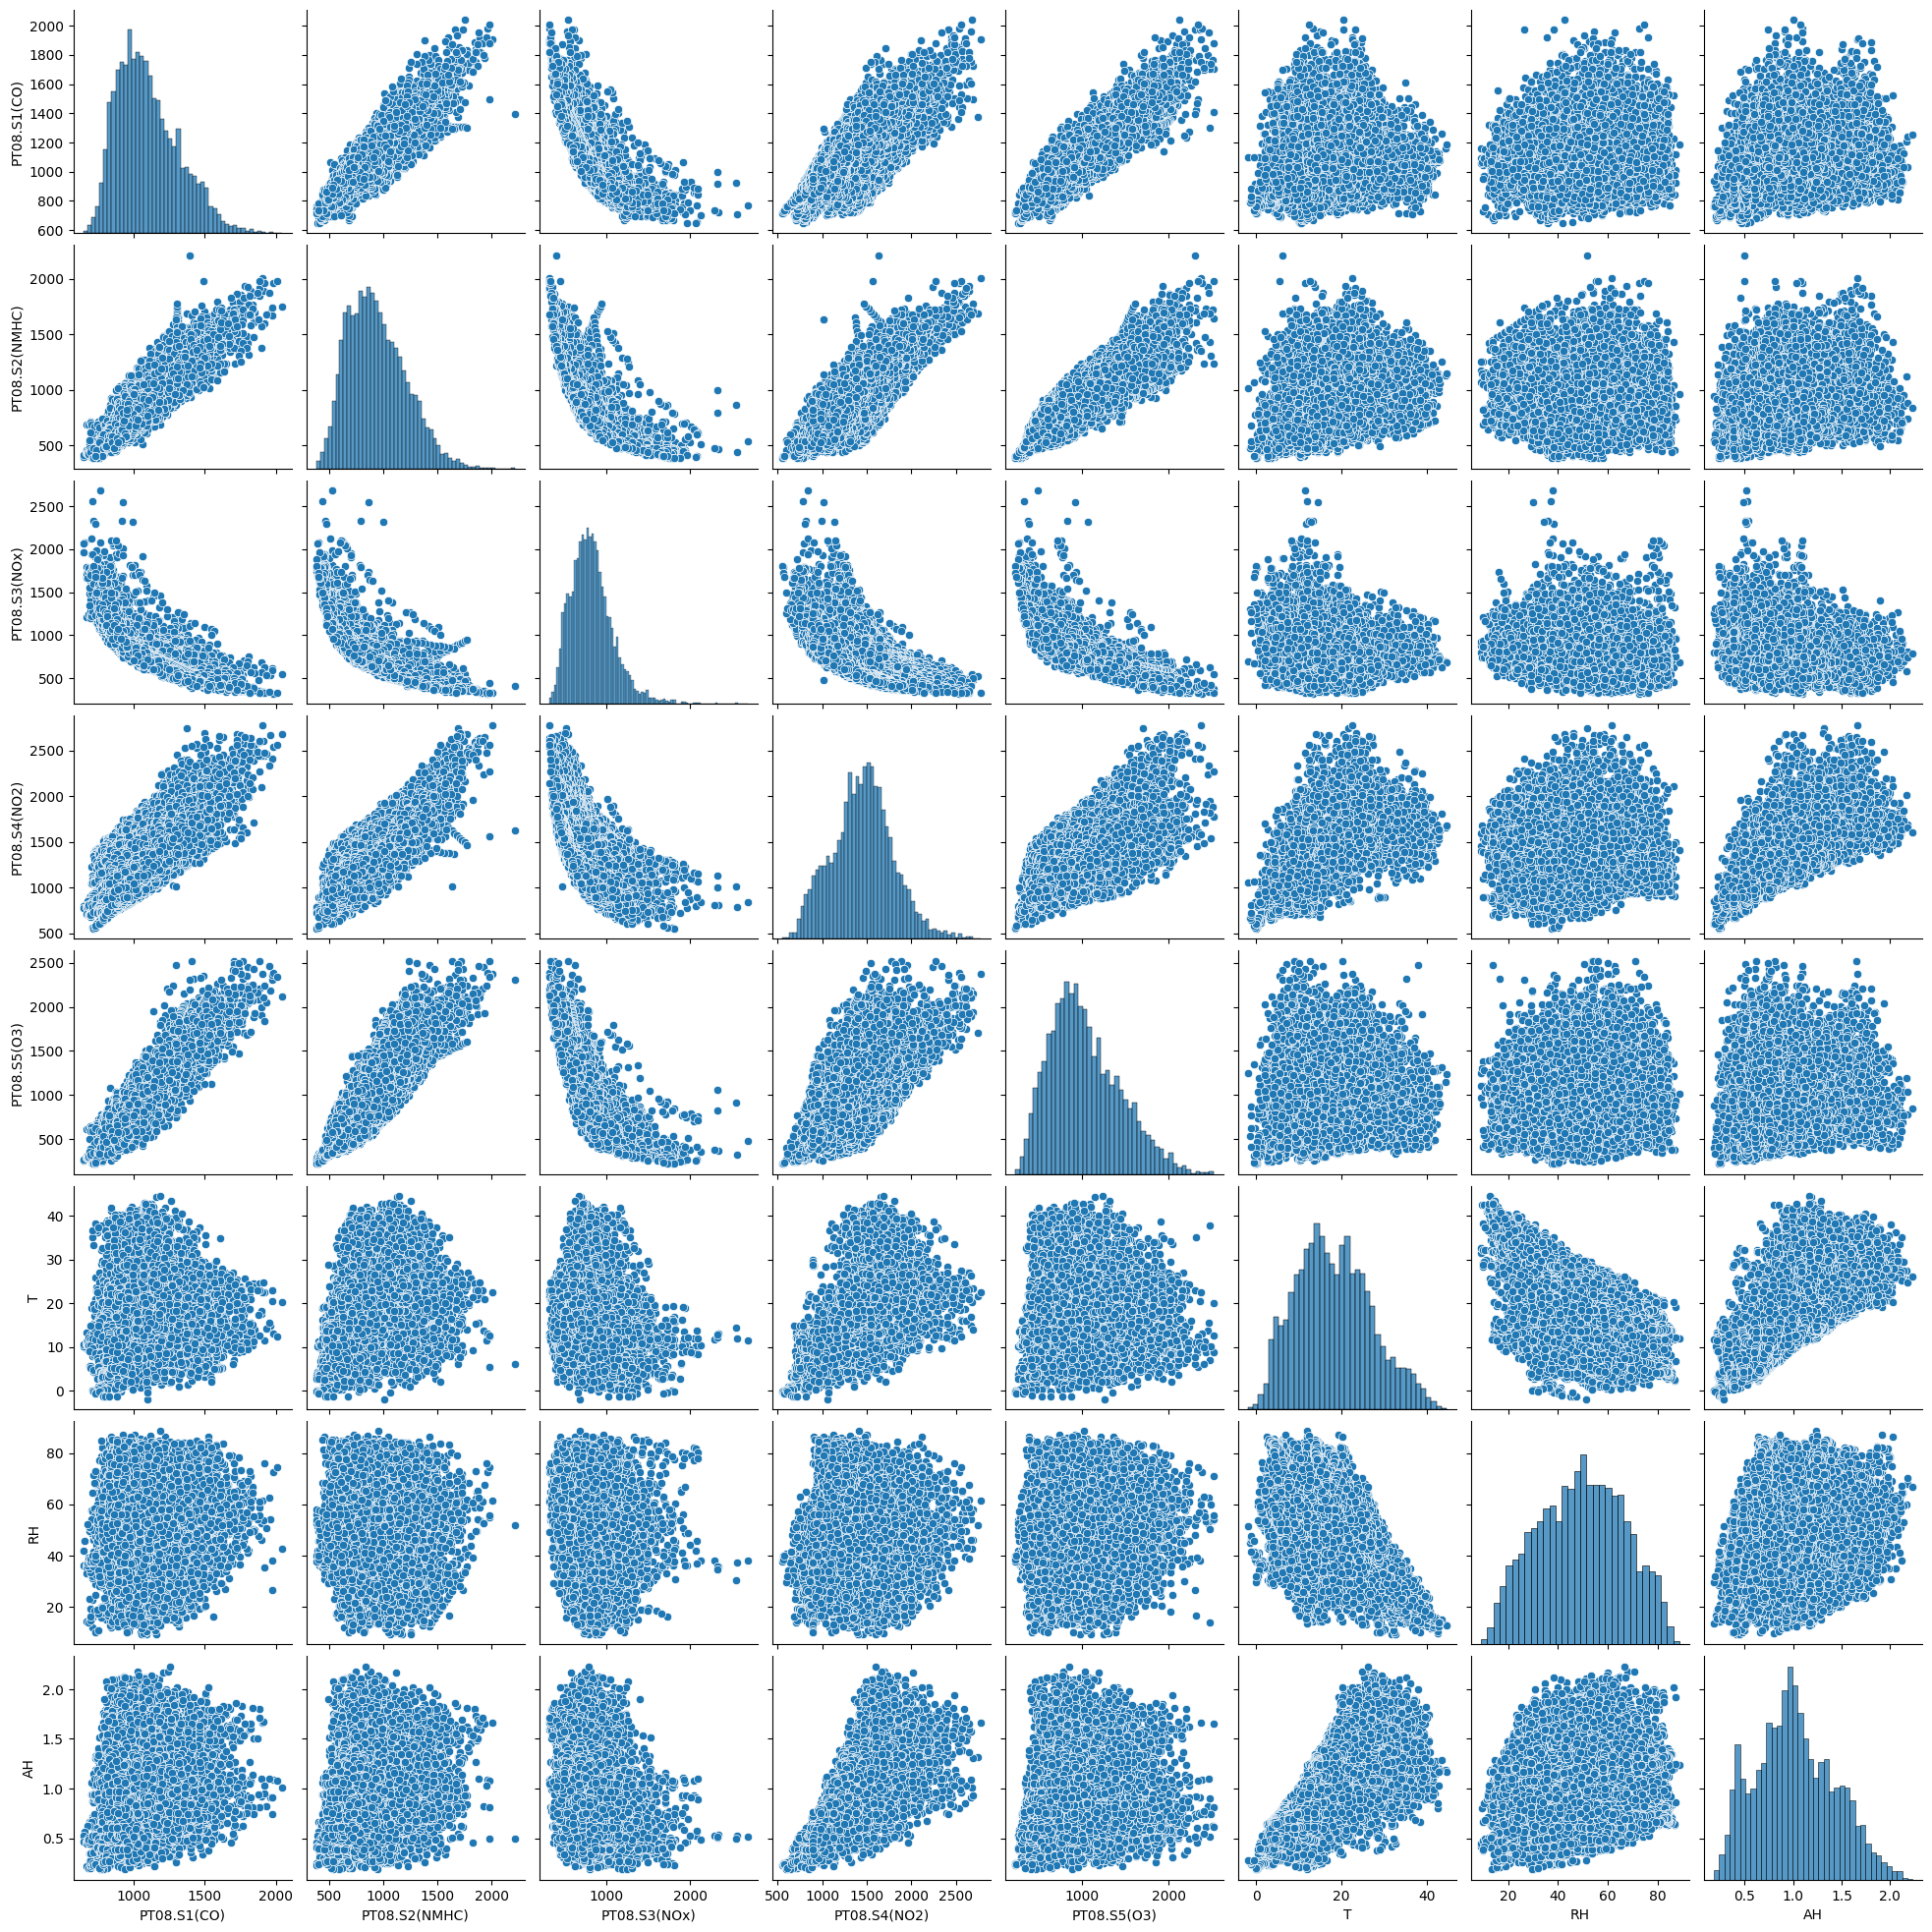

In [40]:
sns.pairplot(df_PT08)
plt.show()

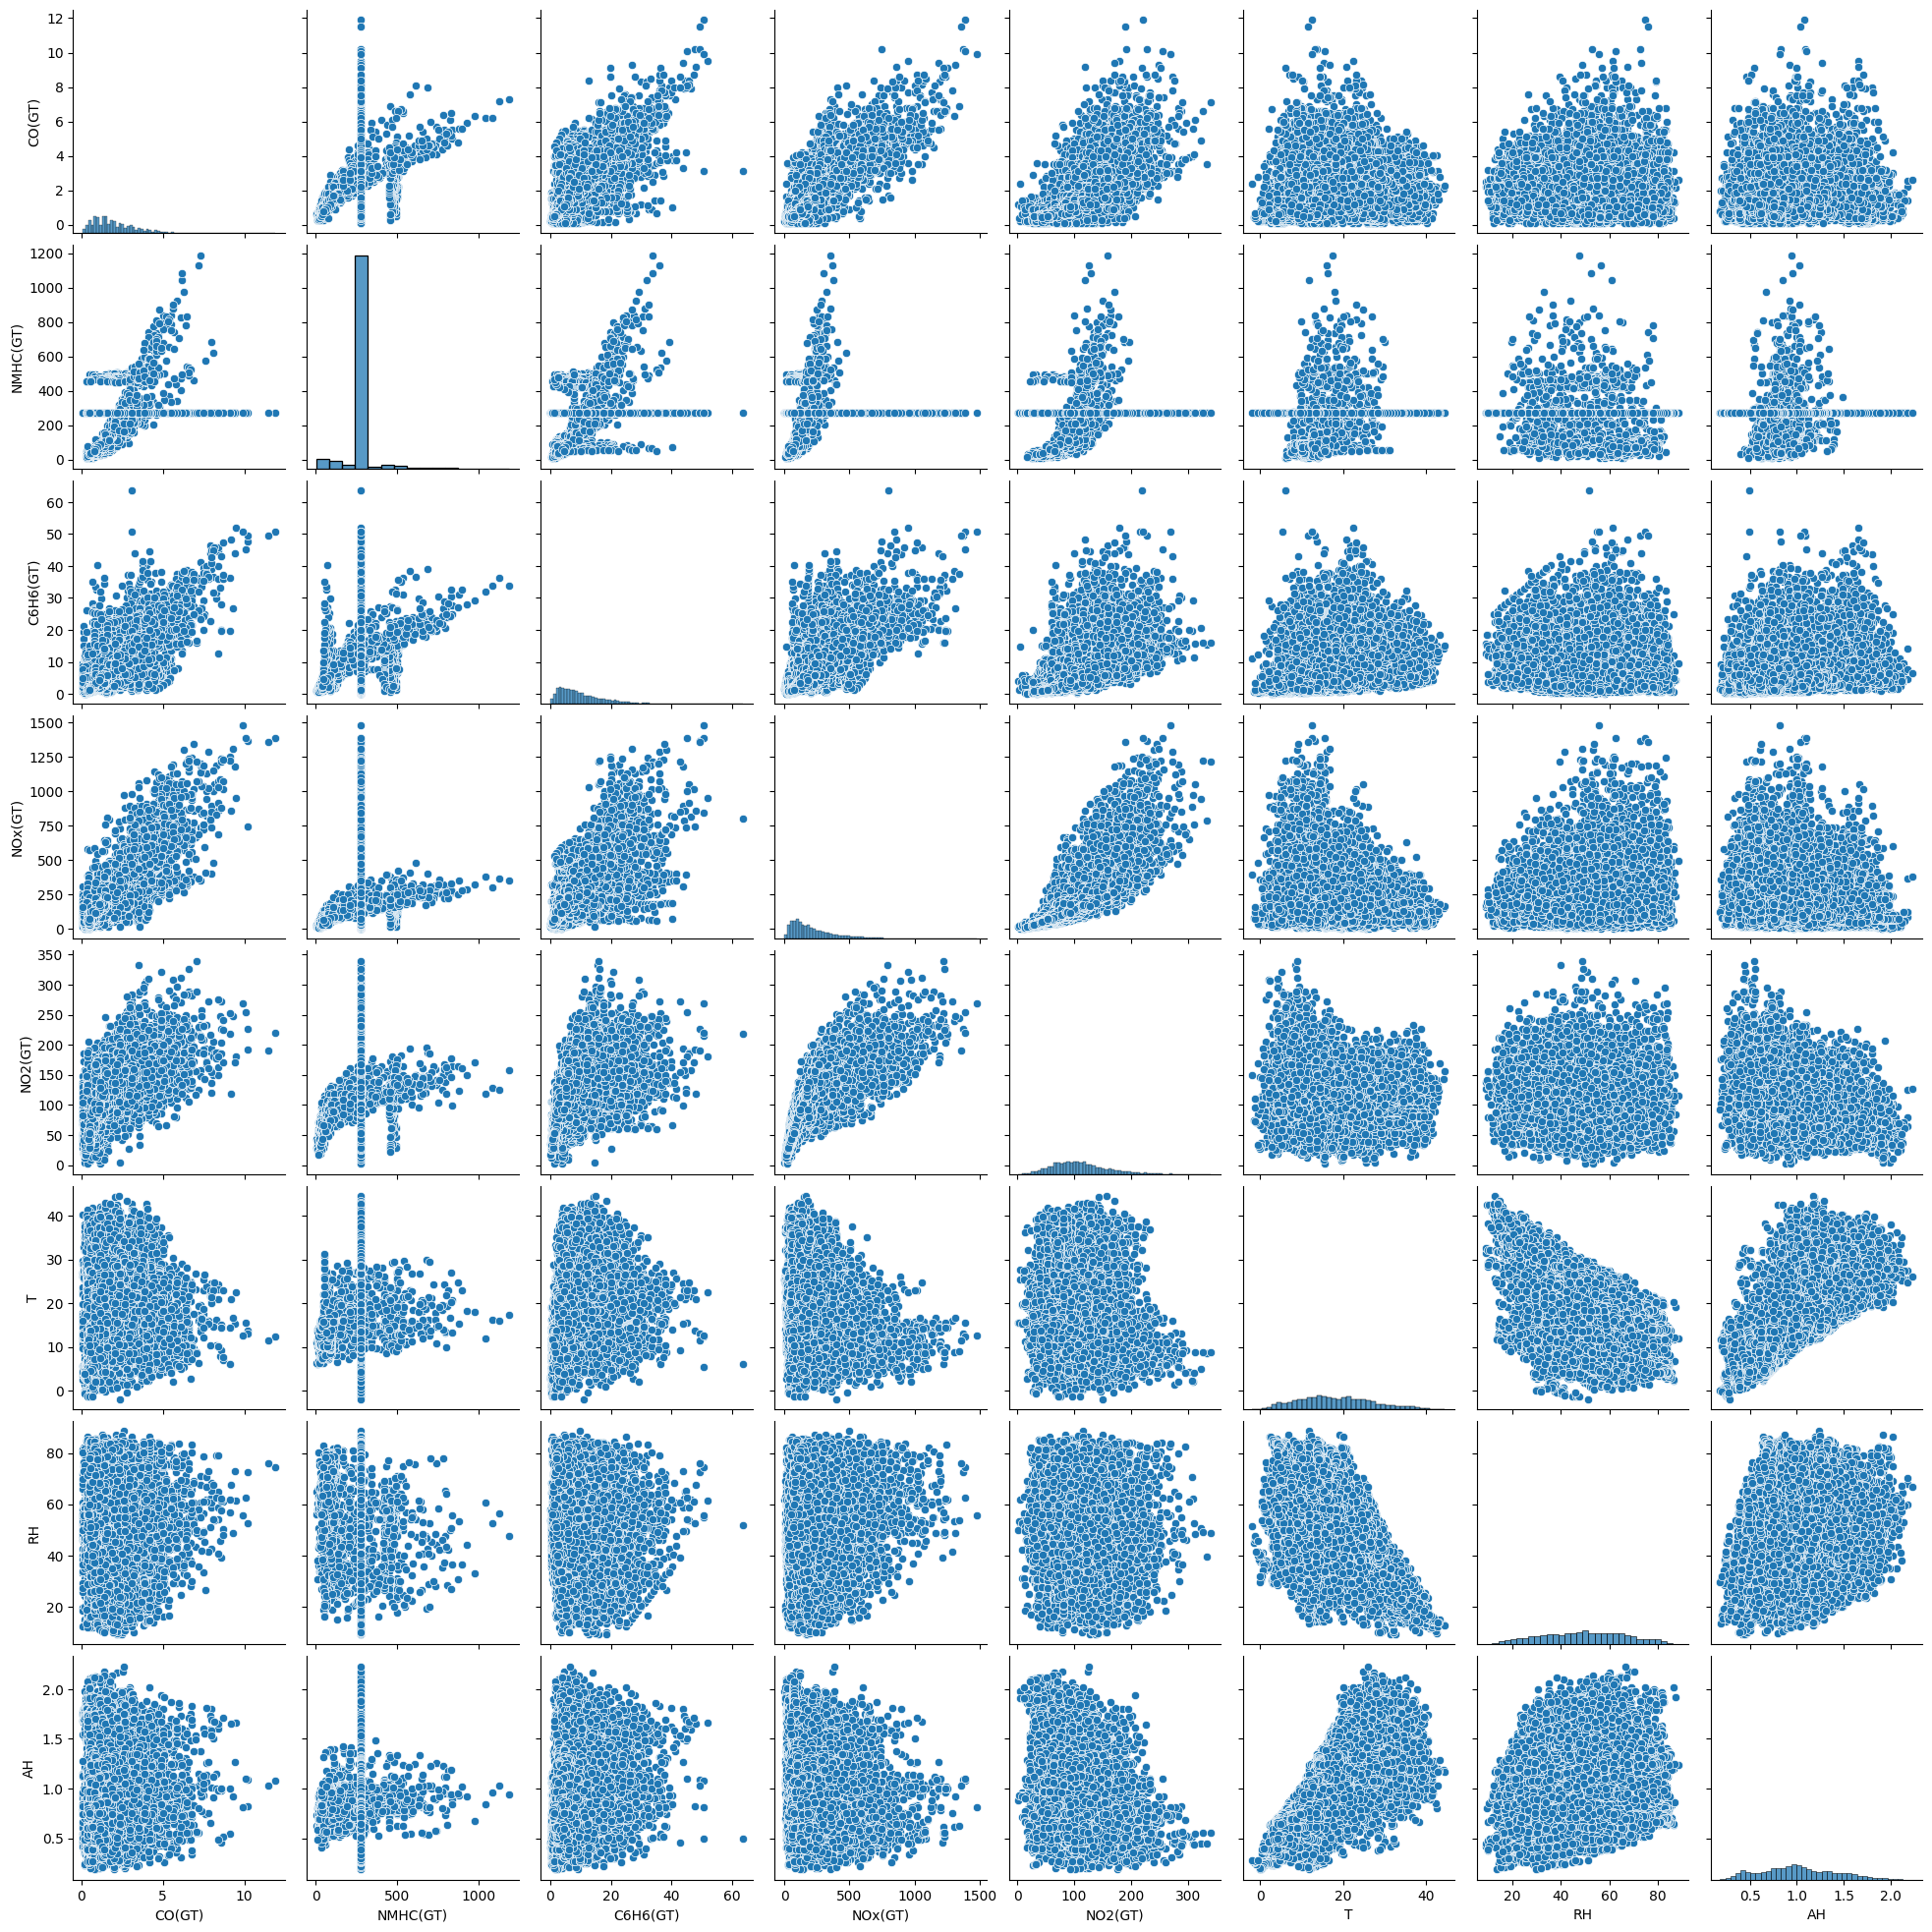

In [42]:
sns.pairplot(df_GT)
plt.show()

# Vamos analisa somente os dados de (PT08) que se referem à resposta média do sensor por hora.

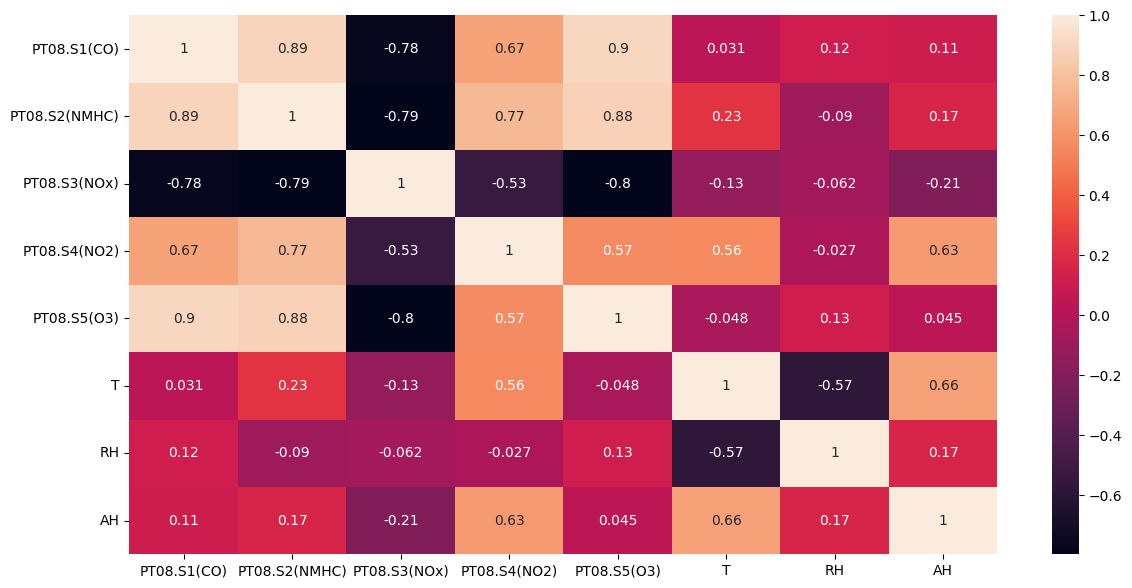

In [46]:
Var_Corr = df_PT08.drop(columns=['Time', 'Date']).corr()
fig,ax = plt.subplots(figsize = (14,7))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, ax = ax)
plt.show()

Observa-se que os valores da matriz de covariância, confirma que os gráficos iniciais estão de acordo com os valores contidos na matriz elemento a elemento. Logo, entendemos que as principais variáveis que explicam a Temperatura são aquelas que estão mais correlacionadas com ela, ou seja, AH, RH, NO2, NMHC. Vamos então verificar a distribuição de cada uma delas de maneira mais próxima.

Vamos realizar um agrupamento por data e após realizar o plot das váriaveis uma em relação as outras

In [198]:
df_agrupado_data = df_PT08.drop(columns=['DateTime', 'Time', 'hour', 'day_of_week', 'mes']).groupby('Date').mean()

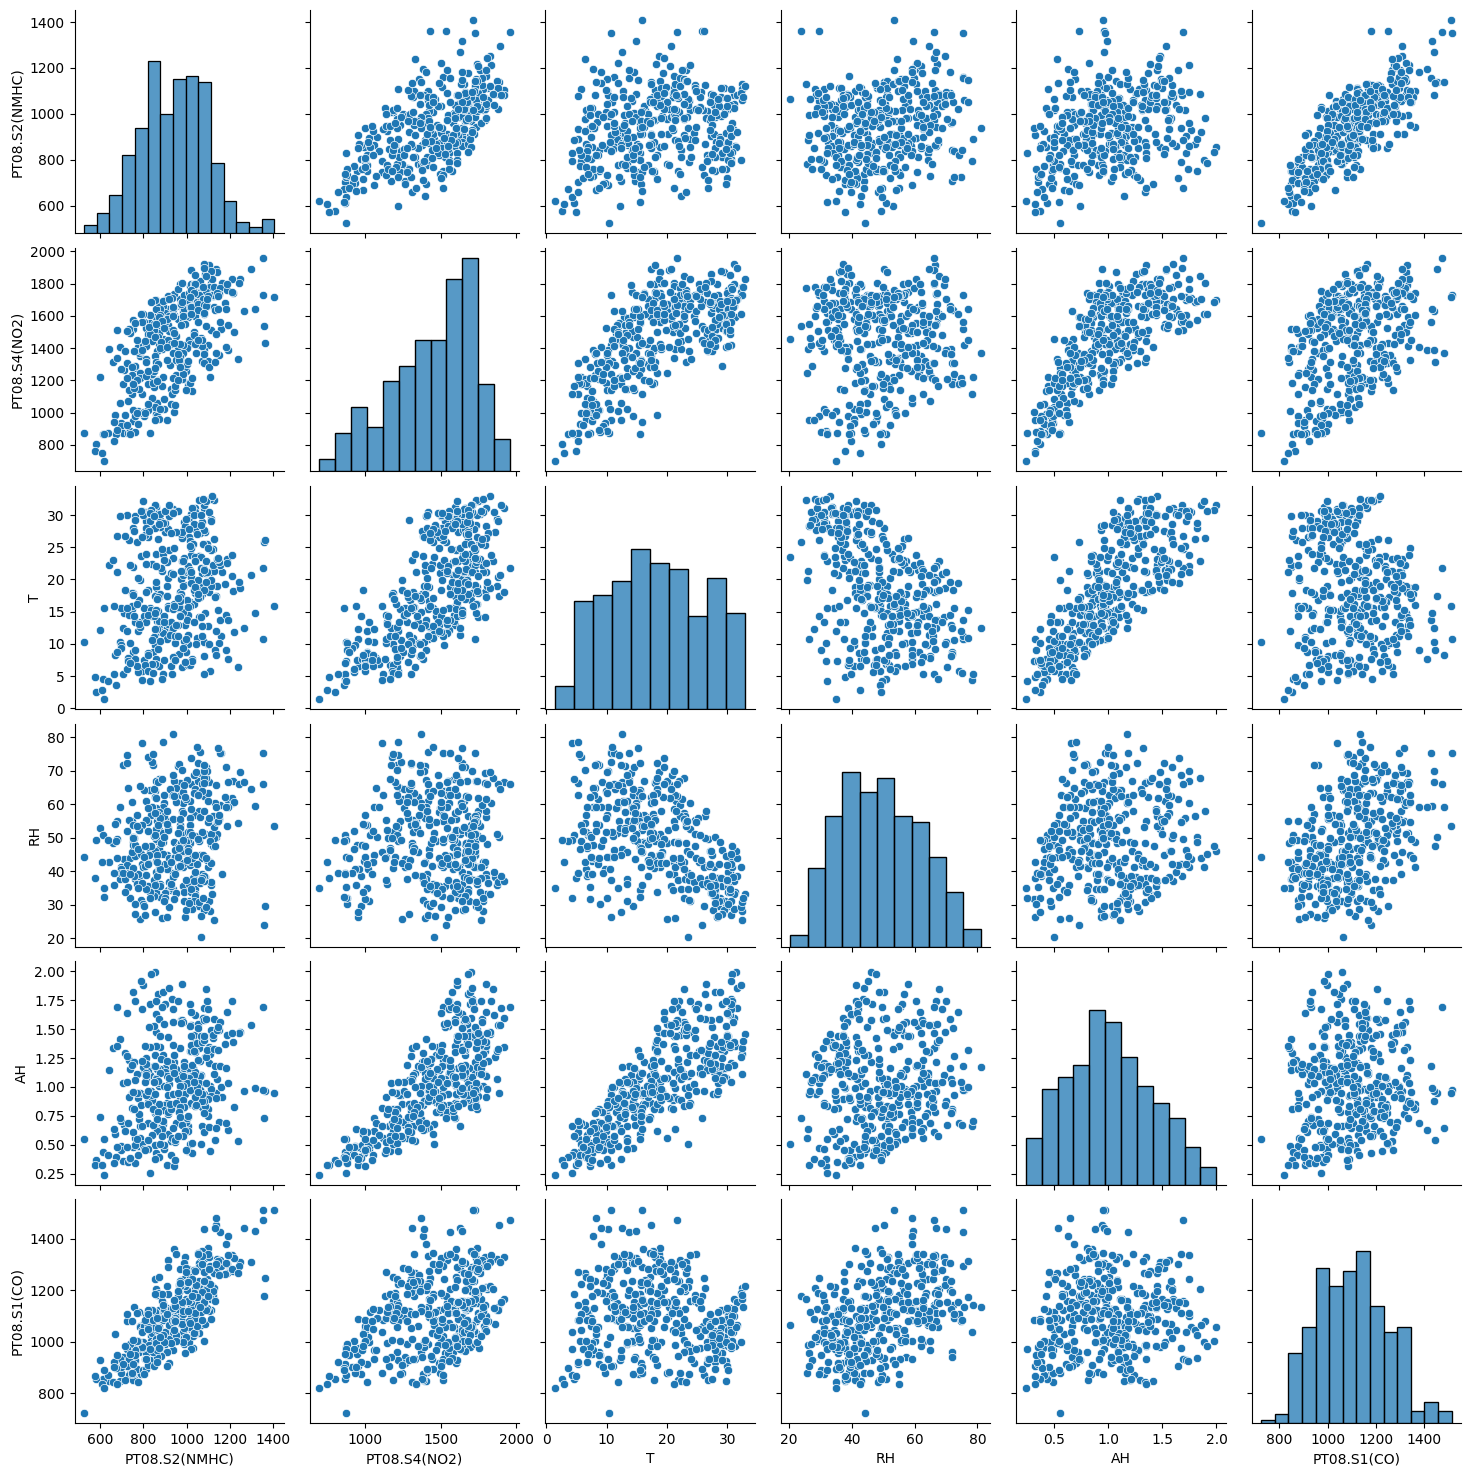

In [200]:
sns.pairplot(df_agrupado_data[['PT08.S2(NMHC)','PT08.S4(NO2)','T','RH','AH', 'PT08.S1(CO)']])
plt.show()

Oberserva-se que a há uma forte correlação entre a temperatura e os poluentes AH, NO2 as demais váriaveis possuem uma Correlação alta porém não há Causalidade entre RH e NMHC com a temperatura

Realizaremos um mapeamento das horas do formato HH:MM:SS para um inteiro de 0 até 23 para falicitar a visualização dos próximos plots.

In [47]:
def hora_to_hora(hora):
  mapper = {f'{hour}:00:00': hour for hour in range(24)}
  mapper.update({f"{hour:02d}:00:00": hour for hour in range(24)})
  return mapper[hora]

In [54]:
# Relação entre as Variáveis Temporais (Date e Time):
# Converter a coluna 'Date' para o tipo datetime
df_PT08['DateTime'] = df_PT08['Date'] + pd.to_timedelta(df_PT08['Time'].astype(str))
df_PT08['DateTime']


C:\Users\Victor\AppData\Local\Temp\ipykernel_13492\1311114889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PT08['DateTime'] = df_PT08['Date'] + pd.to_timedelta(df_PT08['Time'].astype(str))


0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Name: DateTime, Length: 9357, dtype: datetime64[ns]

In [ ]:
df_PT08['hour'] = df_PT08['Time'].astype(str).apply(hora_to_hora)

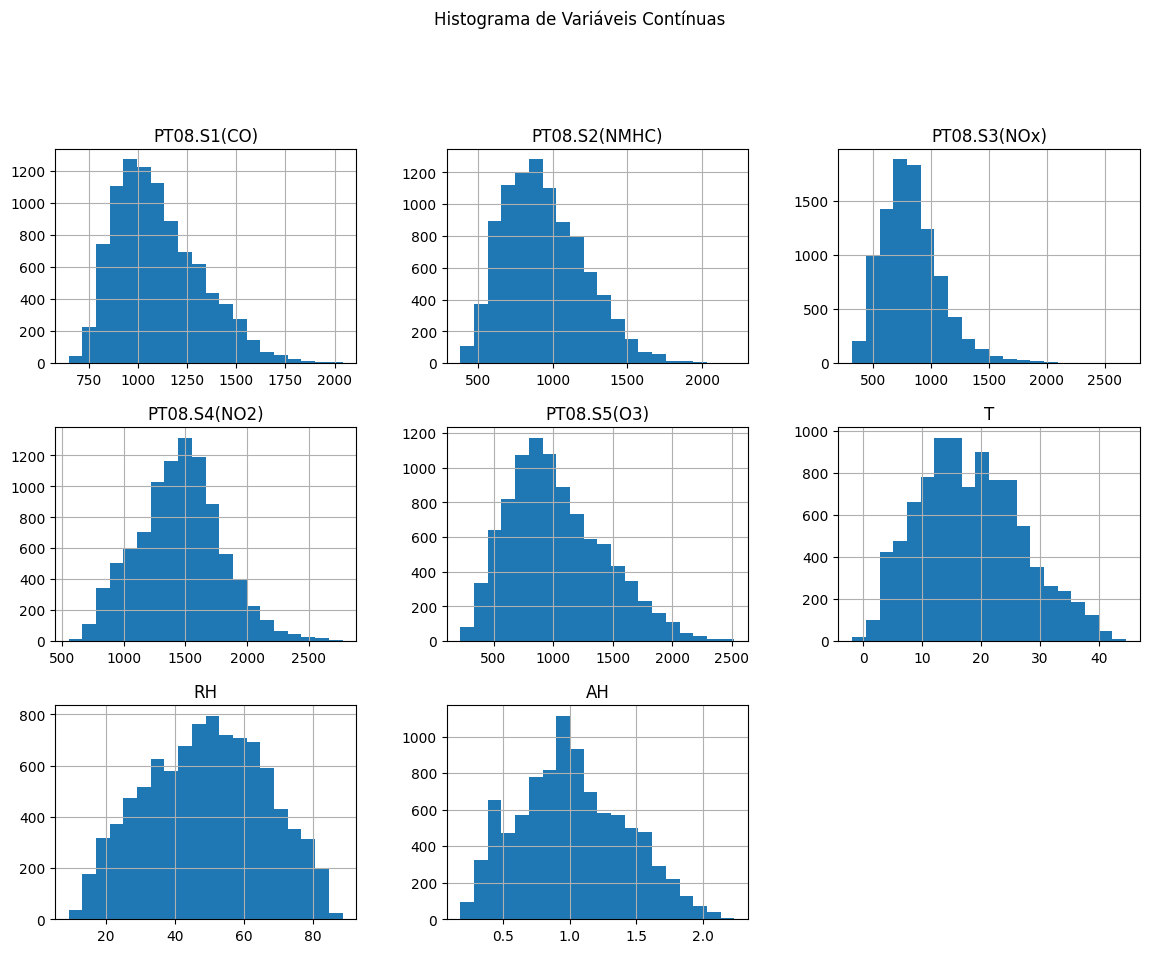

In [66]:
# Análise de Distribuição das Variáveis Contínuas:
# Histograma para todas as variáveis contínuas
df_PT08.drop(columns=['hour', 'Date', 'DateTime']).hist(figsize=(14, 10), bins=20)
plt.suptitle('Histograma de Variáveis Contínuas', y=1.02)
plt.show()


Text(0.5, 1.0, 'Distribuição de PT08.S1(CO)')

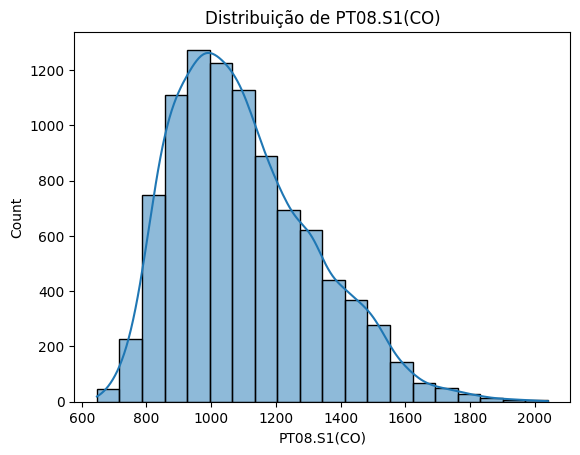

In [186]:
# Distribuição de variáveis específicas
sns.histplot(df_PT08['PT08.S1(CO)'], bins=20, kde=True)
plt.title('Distribuição de PT08.S1(CO)')


Text(0.5, 1.0, 'Distribuição de PT08.S4(NO2)')

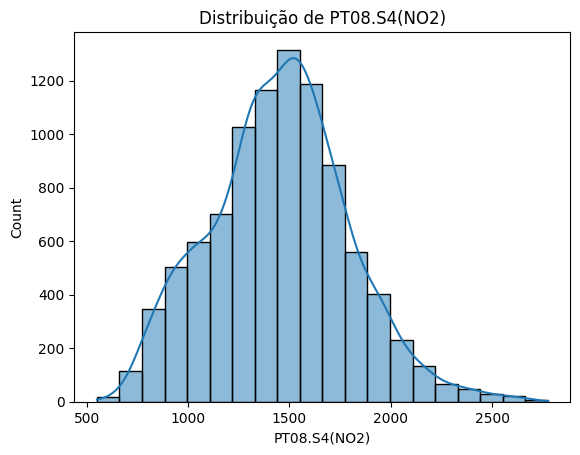

In [188]:
# Distribuição de variáveis específicas
sns.histplot(df_PT08['PT08.S4(NO2)'], bins=20, kde=True)
plt.title('Distribuição de PT08.S4(NO2)')


Text(0.5, 1.0, 'Distribuição de T')

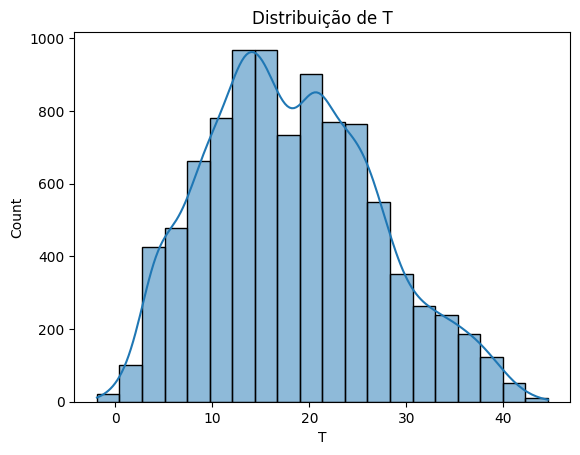

In [189]:
# Distribuição de variáveis específicas
sns.histplot(df_PT08['T'], bins=20, kde=True)
plt.title('Distribuição de T')


Vamos realizar um mapeamento da coluna 'DateTime' para o dia da semana 

In [86]:
#Mapeamento da data em dia da semana:
from datetime import datetime

def date_to_day(date_string):
    # Assuming date_string is in the format 'MM/DD/YYYY'
    date_object = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')
    day_of_week = date_object.strftime('%A')  # %A gives the full weekday name
    return day_of_week


In [91]:
from datetime import datetime
import locale

def date_to_day(date_string):
    # Definindo o idioma para português do Brasil
    locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')
    
    # Supondo que date_string está no formato 'YYYY-MM-DD HH:MM:SS'
    date_object = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')
    day_of_week = date_object.strftime('%A')  # %A fornece o nome completo do dia da semana
    return day_of_week

In [105]:
day_mapp = {
    'domingo': 'Domingo',
    'quarta-feira': 'Quarta-feira',
    'quinta-feira': 'Quinta-feira',
    'segunda-feira': 'Segunda-feira',
    'sexta-feira': 'Sexta-feira',
    'sÃ¡bado': 'Sábado',
    'terÃ§a-feira': 'Terça-feira'
}

In [ ]:
df_PT08['day_of_week'] = df_PT08['Date'].apply(lambda x: day_mapp[date_to_day(str(x))])

In [107]:
df_PT08.shape

(9357, 13)

Vamos realizar um agrupamento entre o dia da semana e a hora do dia e após plotar um gráfico para checar a correlação entre dia e hora com o nivel de conentração de CO, NO2 e Temperatura

In [108]:
df_PT08.head()

Date      Time  PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0 2004-03-10  18:00:00       1360.0         1046.0        1056.0   
1 2004-03-10  19:00:00       1292.0          955.0        1174.0   
2 2004-03-10  20:00:00       1402.0          939.0        1140.0   
3 2004-03-10  21:00:00       1376.0          948.0        1092.0   
4 2004-03-10  22:00:00       1272.0          836.0        1205.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH            DateTime  hour  \
0        1692.0       1268.0  13.6  48.9  0.7578 2004-03-10 18:00:00    18   
1        1559.0        972.0  13.3  47.7  0.7255 2004-03-10 19:00:00    19   
2        1555.0       1074.0  11.9  54.0  0.7502 2004-03-10 20:00:00    20   
3        1584.0       1203.0  11.0  60.0  0.7867 2004-03-10 21:00:00    21   
4        1490.0       1110.0  11.2  59.6  0.7888 2004-03-10 22:00:00    22   

    day_of_week  
0  Quarta-feira  
1  Quarta-feira  
2  Quarta-feira  
3  Quarta-feira  
4  Quarta-feira

In [109]:
df_PT08.dtypes

Date             datetime64[ns]
Time                     object
PT08.S1(CO)             float64
PT08.S2(NMHC)           float64
PT08.S3(NOx)            float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
DateTime         datetime64[ns]
hour                      int64
day_of_week              object
dtype: object

In [110]:
df_PT08_agrupado_dia = df_PT08.groupby(['day_of_week', 'Time'], as_index=False).mean()
df_PT08_agrupado_dia.hour = df_PT08_agrupado_dia.hour.astype(int)

In [126]:
df_PT08_agrupado_dia.head()

day_of_week      Time                Date  PT08.S1(CO)  PT08.S2(NMHC)  \
0     Domingo   0:00:00 2004-09-22 12:00:00  1147.115842     932.837912   
1     Domingo  10:00:00 2004-09-22 12:00:00  1021.203297     777.630495   
2     Domingo  11:00:00 2004-09-22 12:00:00  1033.713828     796.765110   
3     Domingo  12:00:00 2004-09-22 12:00:00  1022.510073     794.399725   
4     Domingo  13:00:00 2004-09-22 12:00:00   989.806319     763.052198   

   PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)          T         RH        AH  \
0    786.833333   1438.464286  1085.696429  16.368727  54.797070  1.062015   
1    939.732143   1315.928571   807.375000  18.743544  46.055769  1.018602   
2    927.398810   1312.660714   805.446429  20.571383  41.131639  0.997022   
3    931.261905   1297.625000   771.446429  21.602793  38.525366  0.979896   
4    982.250000   1263.714286   706.464286  21.946703  37.795879  0.961771   

             DateTime  hour  
0 2004-09-22 12:00:00     0  
1 2004-09-22 22:00:00    10  
2 2004-09-22 23:00:00    11  
3 2004-09-23 00:00:00    12  
4 2004-09-23 01:00:00    13

In [113]:
dias = ['Domingo', 'Quarta-feira', 'Quinta-feira', 'Segunda-feira', 'Sexta-feira', 'Sábado', 'Terça-feira']

In [138]:
#Função auxiliar para realizar o plot dos dados por dia e por hora.
def plot_per_day(df, dias, coluna):
    for dia in dias:
        df_to_plot = df[df['day_of_week'] == dia]
        df_to_plot = df_to_plot.sort_values(by='hour')
        fig, ax = plt.subplots()
        ax.plot(df_to_plot['hour'], df_to_plot[coluna])

        ax.set(xlabel='hora', ylabel='Concentração de PT08.S1(CO)',
                title=f'Concentração de PT08.S1(CO) vs Hora ({dia})')
        ax.grid()
        plt.show()

Vamos realizar o plot dos graficos de concentração de CO vers hora nos dias 

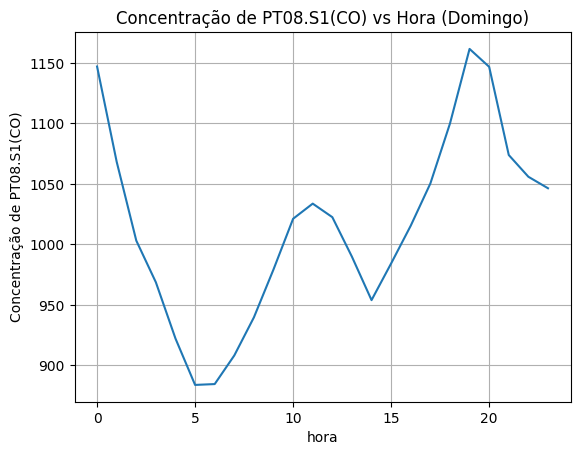

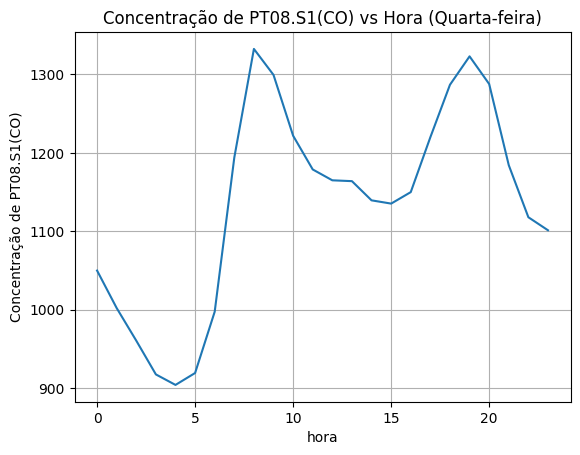

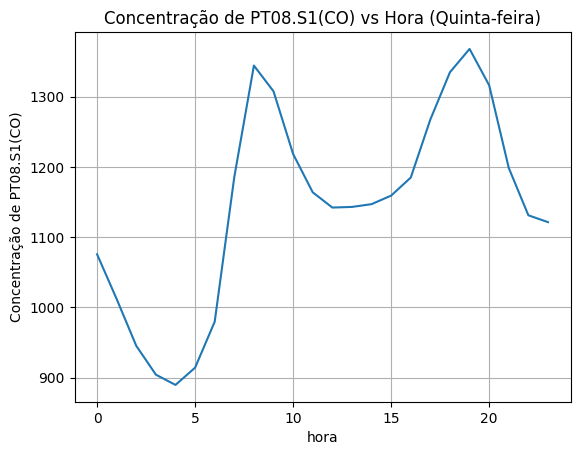

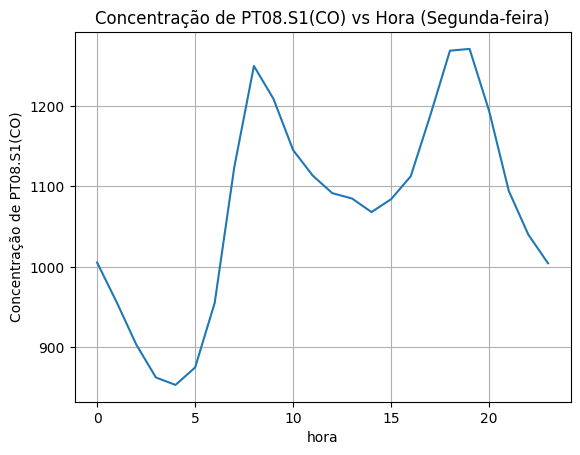

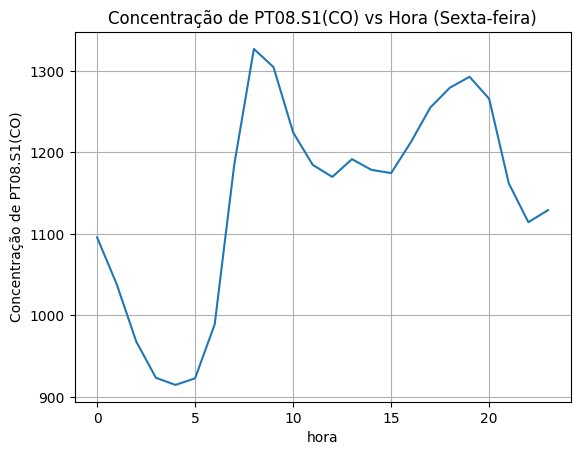

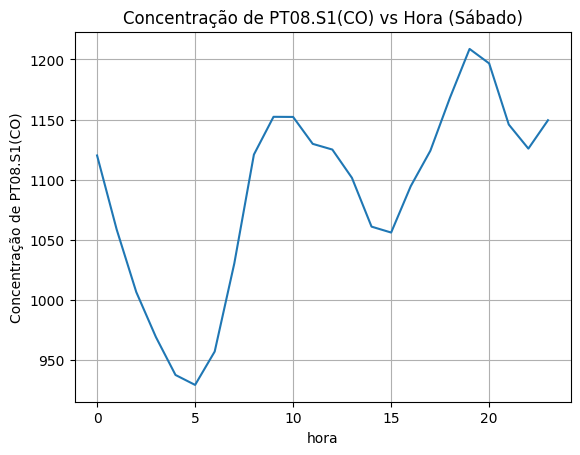

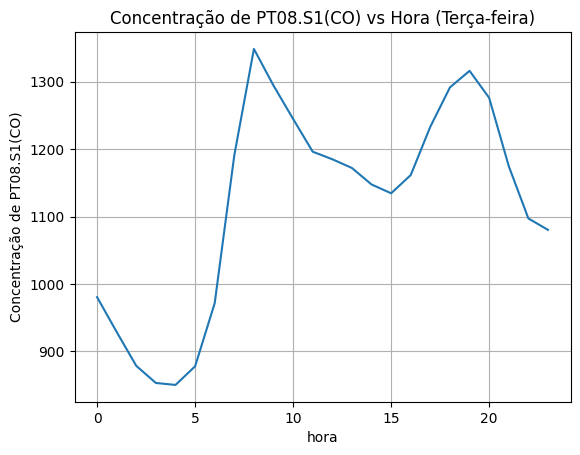

In [139]:
plot_per_day(df_PT08_agrupado_dia, dias, 'PT08.S1(CO)')

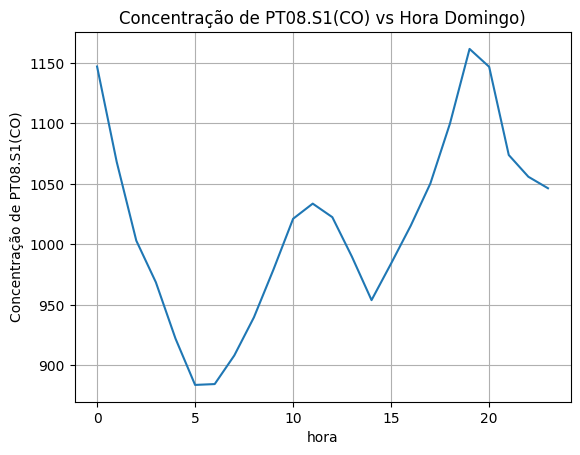

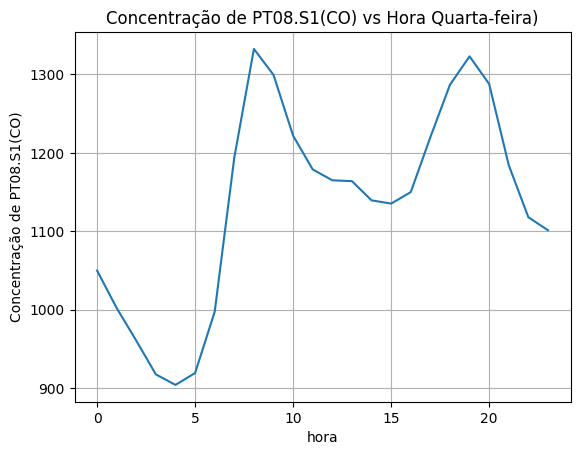

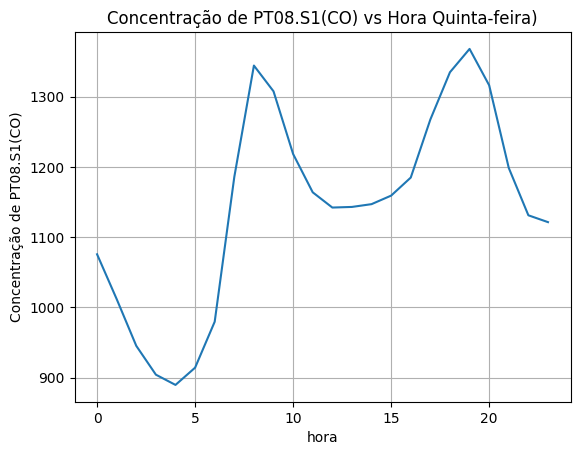

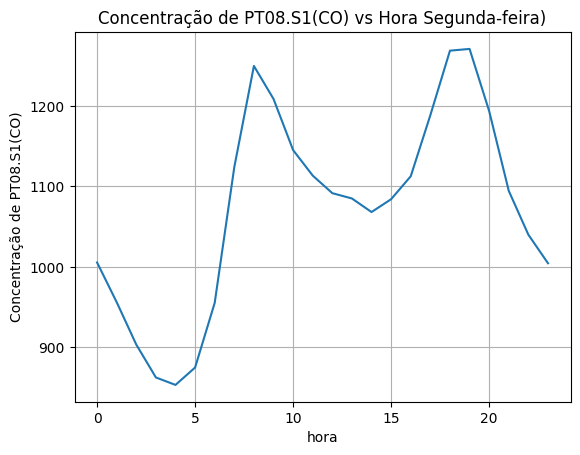

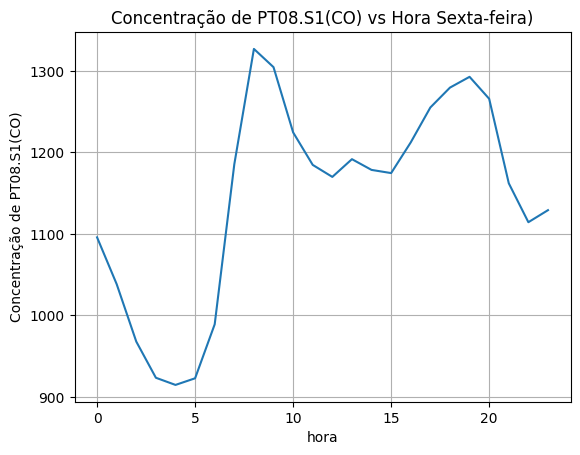

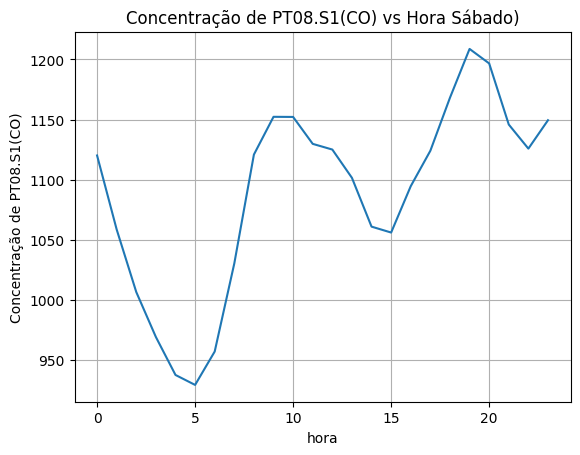

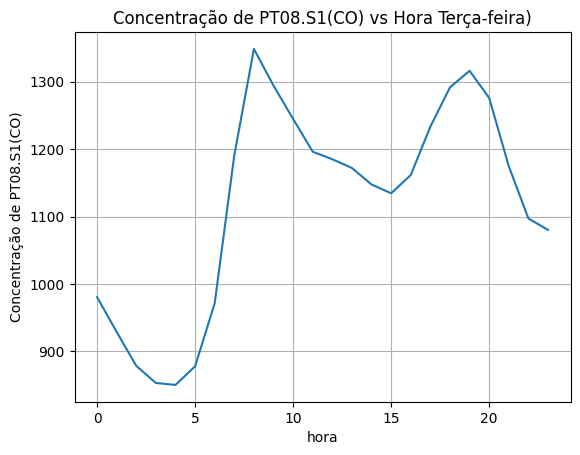

Vamos realizar o plot dos graficos de concentração de NO2 vers hora nos dias 

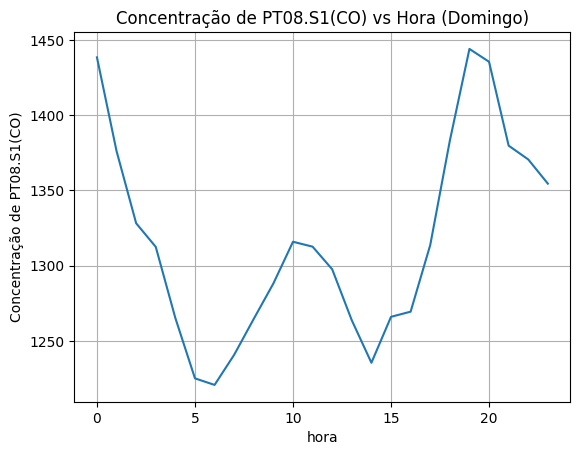

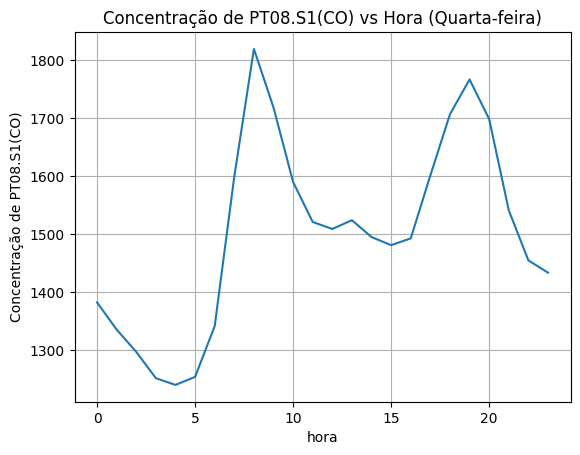

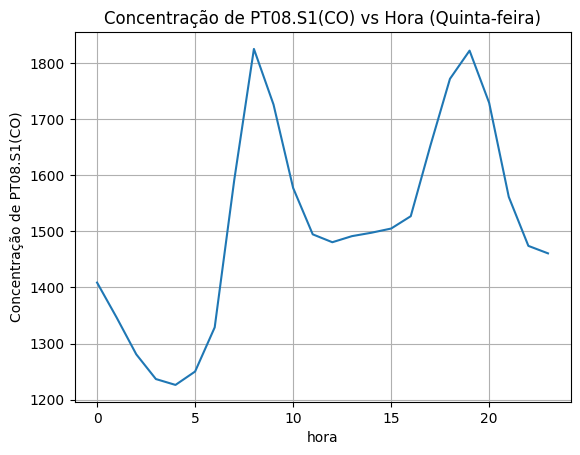

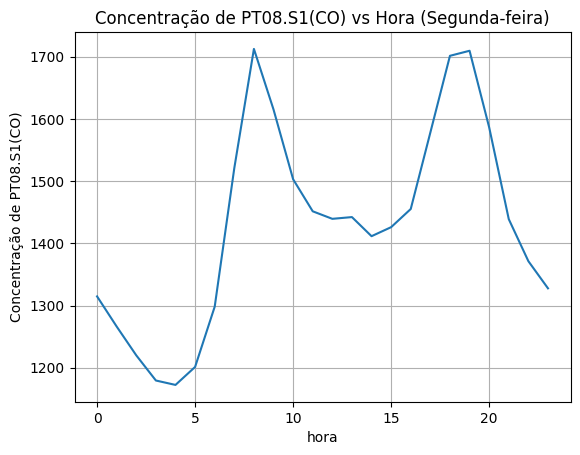

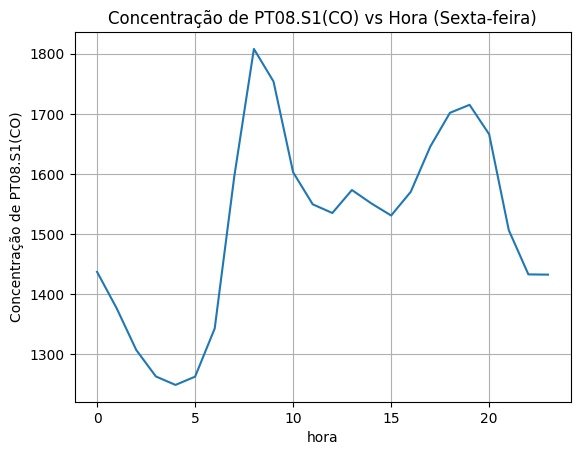

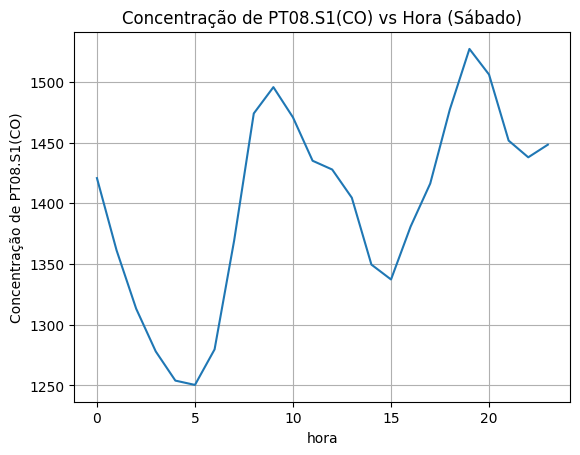

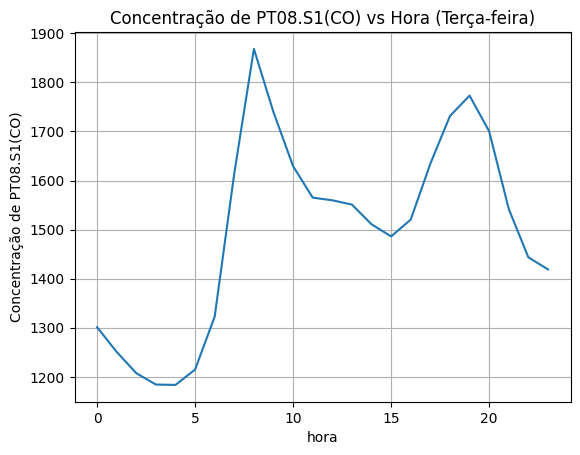

In [141]:
plot_per_day(df_PT08_agrupado_dia, dias, 'PT08.S4(NO2)')

Vamos plotar a variação de temperatura ao longo das horas nos dias da semana

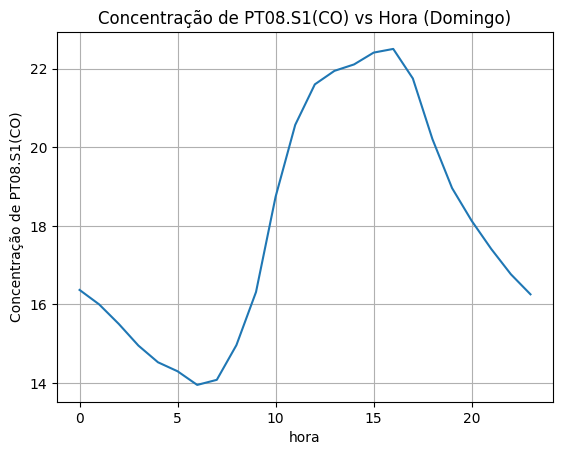

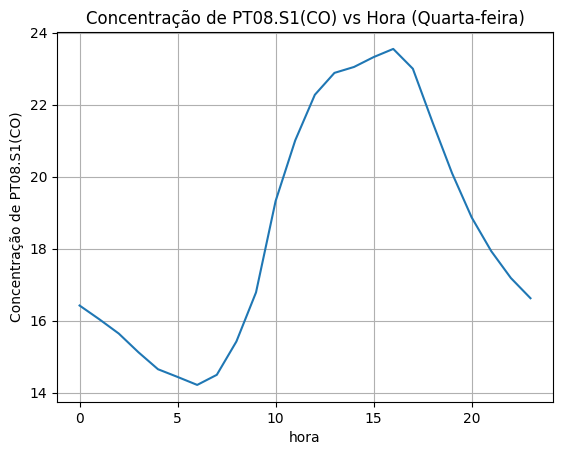

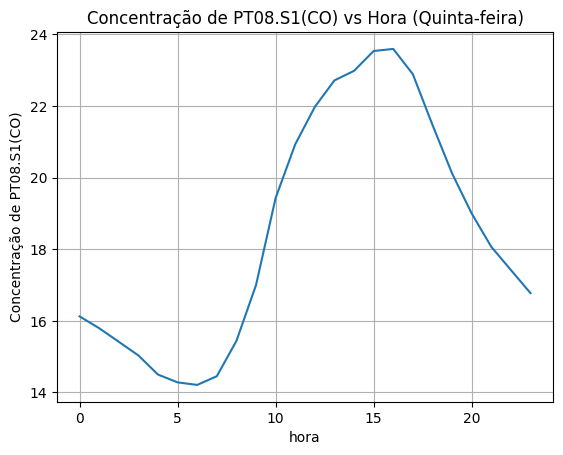

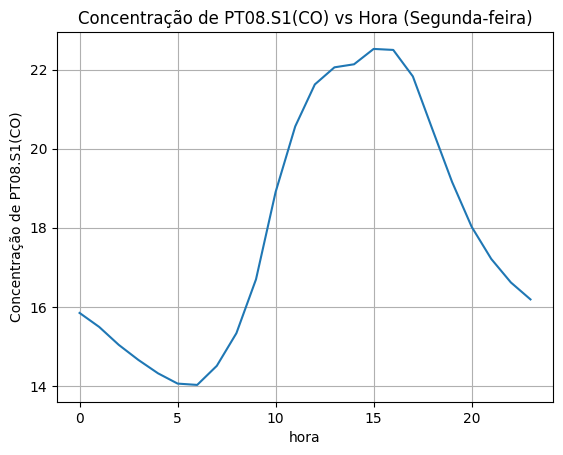

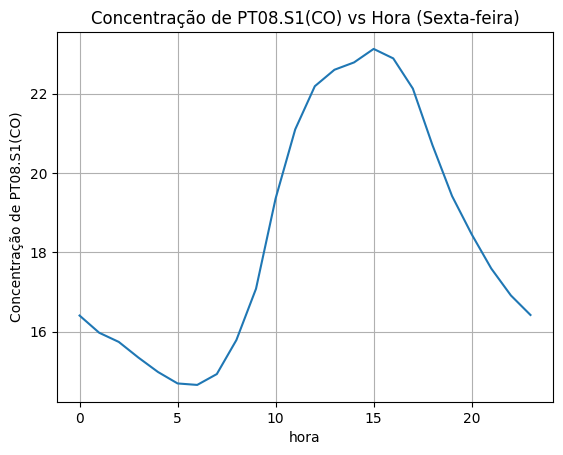

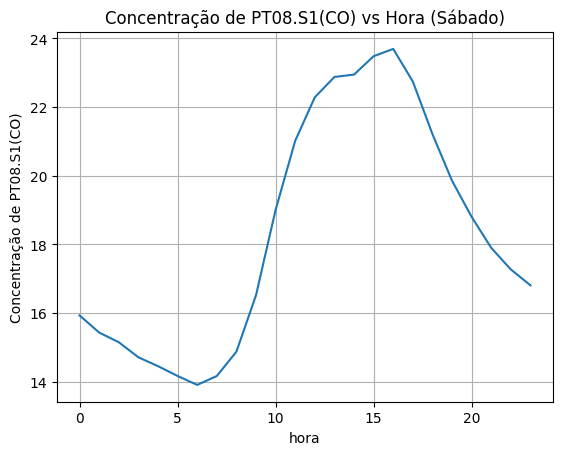

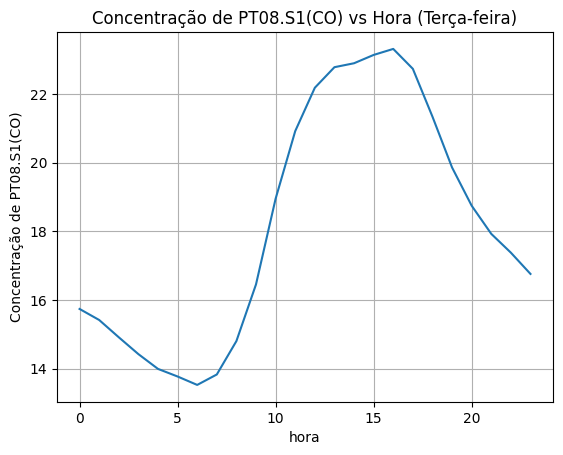

In [142]:
plot_per_day(df_PT08_agrupado_dia, dias, 'T')

Vamos realizar a plotagem de boxplot para os atributos CO, NO2 e T

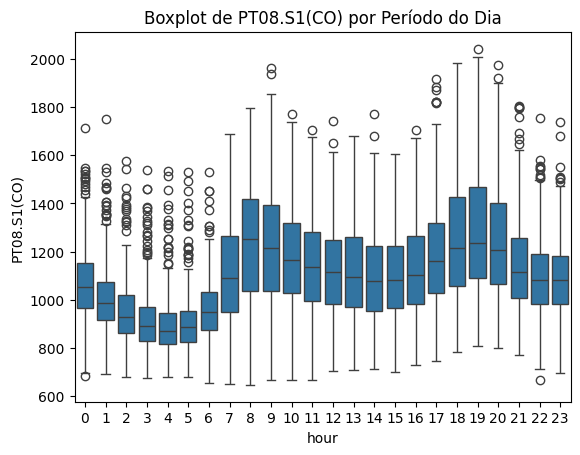

In [144]:
# Boxplot de PT08.S4(CO) por período do dia.
sns.boxplot(x='hour', y='PT08.S1(CO)', data=df_PT08)
plt.title('Boxplot de PT08.S1(CO) por Período do Dia')
plt.show()

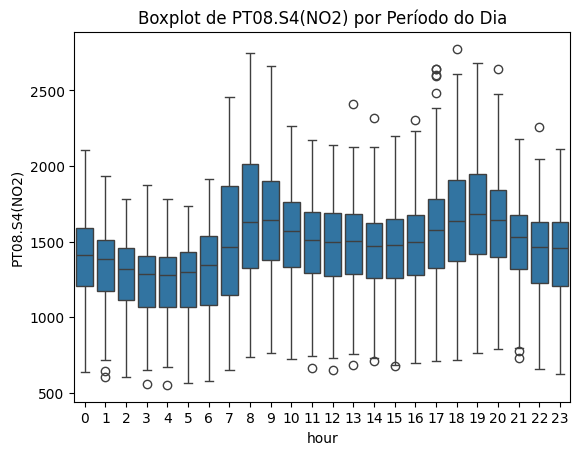

In [135]:
# Boxplot de PT08.S4(NO2) por período do dia.
sns.boxplot(x='hour', y='PT08.S4(NO2)', data=df_PT08)
plt.title('Boxplot de PT08.S4(NO2) por Período do Dia')
plt.show()

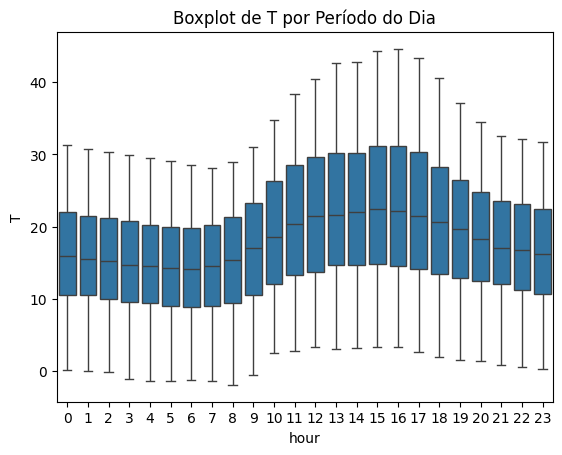

In [145]:
# Boxplot de T por período do dia.
sns.boxplot(x='hour', y='T', data=df_PT08)
plt.title('Boxplot de T por Período do Dia')
plt.show()

Vamos agora plotar o mapa de calor em relação aos meses do ano para determinar tentar identificar alguma relação entre a concentração de poluentes e a temperatura

In [ ]:
# Análise da poluição e tipos de poluentes ao longo dos meses
df_PT08['mes'] = df_PT08['DateTime'].dt.month

In [183]:
df_meses = df_PT08.drop(columns=['Date', 'Time', 'DateTime', 'hour', 'day_of_week']).groupby(['mes'], as_index=True).mean()

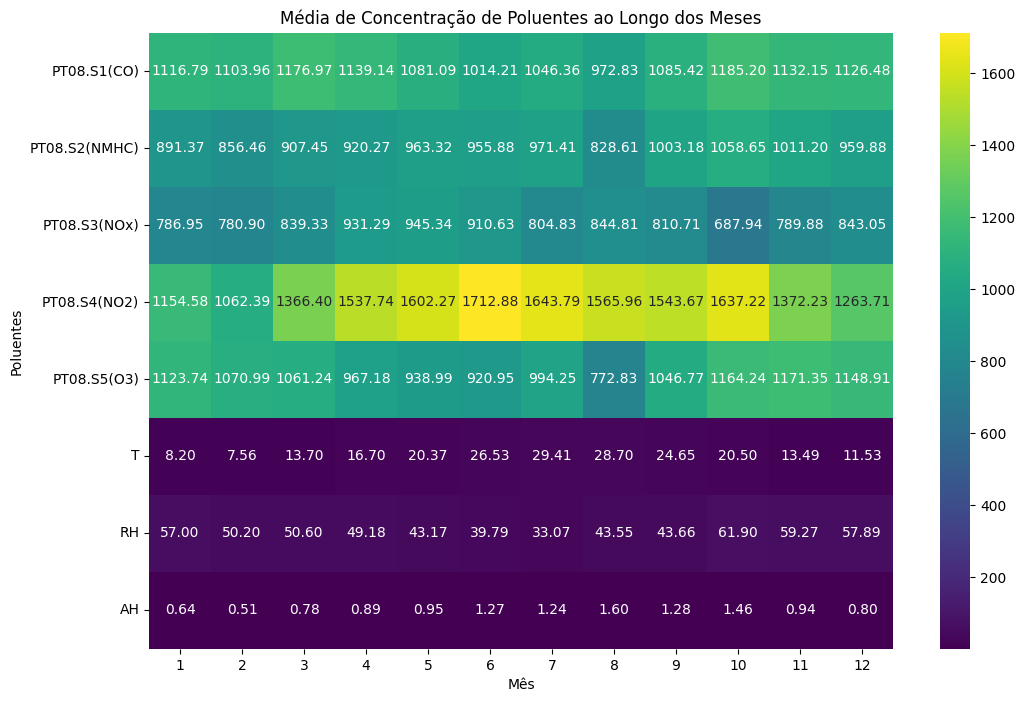

In [185]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_meses.T, cmap='viridis', annot=True, fmt=".2f")
plt.title('Média de Concentração de Poluentes ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Poluentes')
plt.show()

# Conclusões:

- É possível observar do mapa de calor acima que a concentração de CO é maior nos meses , de Outubro à março, isso se deve ao fato desses meses terem uma temperatura mais baixa, o que concide com o período de outono e inverno na Europa. 

- Oberserva-se também que há de fato uma forte relação entre a concentração de NO2 com a temperatura visto que nos meses em que a temperatura é mais elevada a concentração de NO2 está mais elevada também. 